# Outlier Detection

## Importing data

In [1]:
import kagglehub
import numpy as np
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("abcsds/pokemon", path="Pokemon.csv")

data = pd.read_csv(path)

## Preprocessing

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


As we could observe for Type 2 with have null values that we need to fix. Also, could be observed that there are 3 features with object dtype.

Post scriptum: although there *Type 2* have missing values it doesn't mean it should have this values. In dataset info is written that there exists pokemons which have two types. Thus, there could be pokemons with only one type.

In [3]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


We will not need the *#* and the *Name* column therefor we will drop these. Also, there are *Type 1* and *Type 2* which are object thus we will apply dummy variables.

In [4]:
# drop '#' column
data = data.drop(["#", "Name"], axis=1)

In [5]:
data = pd.get_dummies(data, columns=["Type 1", "Type 2"], drop_first=True)

In [6]:
data.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Dark,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,318,45,49,49,65,65,45,1,False,False,...,False,False,False,False,False,True,False,False,False,False
1,405,60,62,63,80,80,60,1,False,False,...,False,False,False,False,False,True,False,False,False,False
2,525,80,82,83,100,100,80,1,False,False,...,False,False,False,False,False,True,False,False,False,False
3,625,80,100,123,122,120,80,1,False,False,...,False,False,False,False,False,True,False,False,False,False
4,309,39,52,43,60,50,65,1,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Total            800 non-null    int64
 1   HP               800 non-null    int64
 2   Attack           800 non-null    int64
 3   Defense          800 non-null    int64
 4   Sp. Atk          800 non-null    int64
 5   Sp. Def          800 non-null    int64
 6   Speed            800 non-null    int64
 7   Generation       800 non-null    int64
 8   Legendary        800 non-null    bool 
 9   Type 1_Dark      800 non-null    bool 
 10  Type 1_Dragon    800 non-null    bool 
 11  Type 1_Electric  800 non-null    bool 
 12  Type 1_Fairy     800 non-null    bool 
 13  Type 1_Fighting  800 non-null    bool 
 14  Type 1_Fire      800 non-null    bool 
 15  Type 1_Flying    800 non-null    bool 
 16  Type 1_Ghost     800 non-null    bool 
 17  Type 1_Grass     800 non-null    bool 
 18  Type 1_Gro

Now everything is all right and we could proceed to the task.

### Best Correlation

In [8]:
abs(data.corr()["Total"]).sort_values()[::-1]

Total              1.000000
Sp. Atk            0.747250
Attack             0.736211
Sp. Def            0.717609
HP                 0.618748
Defense            0.612787
Speed              0.575943
Legendary          0.501758
Type 1_Dragon      0.196532
Type 2_Fighting    0.138726
Type 2_Dragon      0.115240
Type 1_Normal      0.104150
Type 2_Ice         0.100870
Type 1_Psychic     0.094364
Type 1_Steel       0.082000
Type 2_Psychic     0.076054
Type 2_Fire        0.073234
Type 2_Steel       0.070307
Type 2_Poison      0.067837
Type 2_Dark        0.065844
Type 1_Poison      0.057123
Type 2_Flying      0.054048
Type 1_Fire        0.050527
Generation         0.048384
Type 2_Grass       0.039224
Type 1_Rock        0.037524
Type 1_Grass       0.036057
Type 1_Flying      0.029504
Type 1_Fighting    0.029086
Type 1_Fairy       0.026948
Type 2_Fairy       0.024606
Type 2_Water       0.018800
Type 1_Dark        0.017818
Type 1_Electric    0.016715
Type 2_Ground      0.016486
Type 1_Water       0

As we could see the most correlated feature are *Sp. Atk* and *Attack*. 

### Temp subset

In [9]:
temp = data[["Sp. Atk", "Attack", "Total"]]
temp.head()

,Sp. Atk,Attack,Total
0,65,49,318
1,80,62,405
2,100,82,525
3,122,100,625
4,60,52,309


## Train and Prediction

### Most Correlated Data

Train and make a prediction using the Isolation Forest, OneClassSVM, Elliptic Envelope and LocalOutlierFactor.

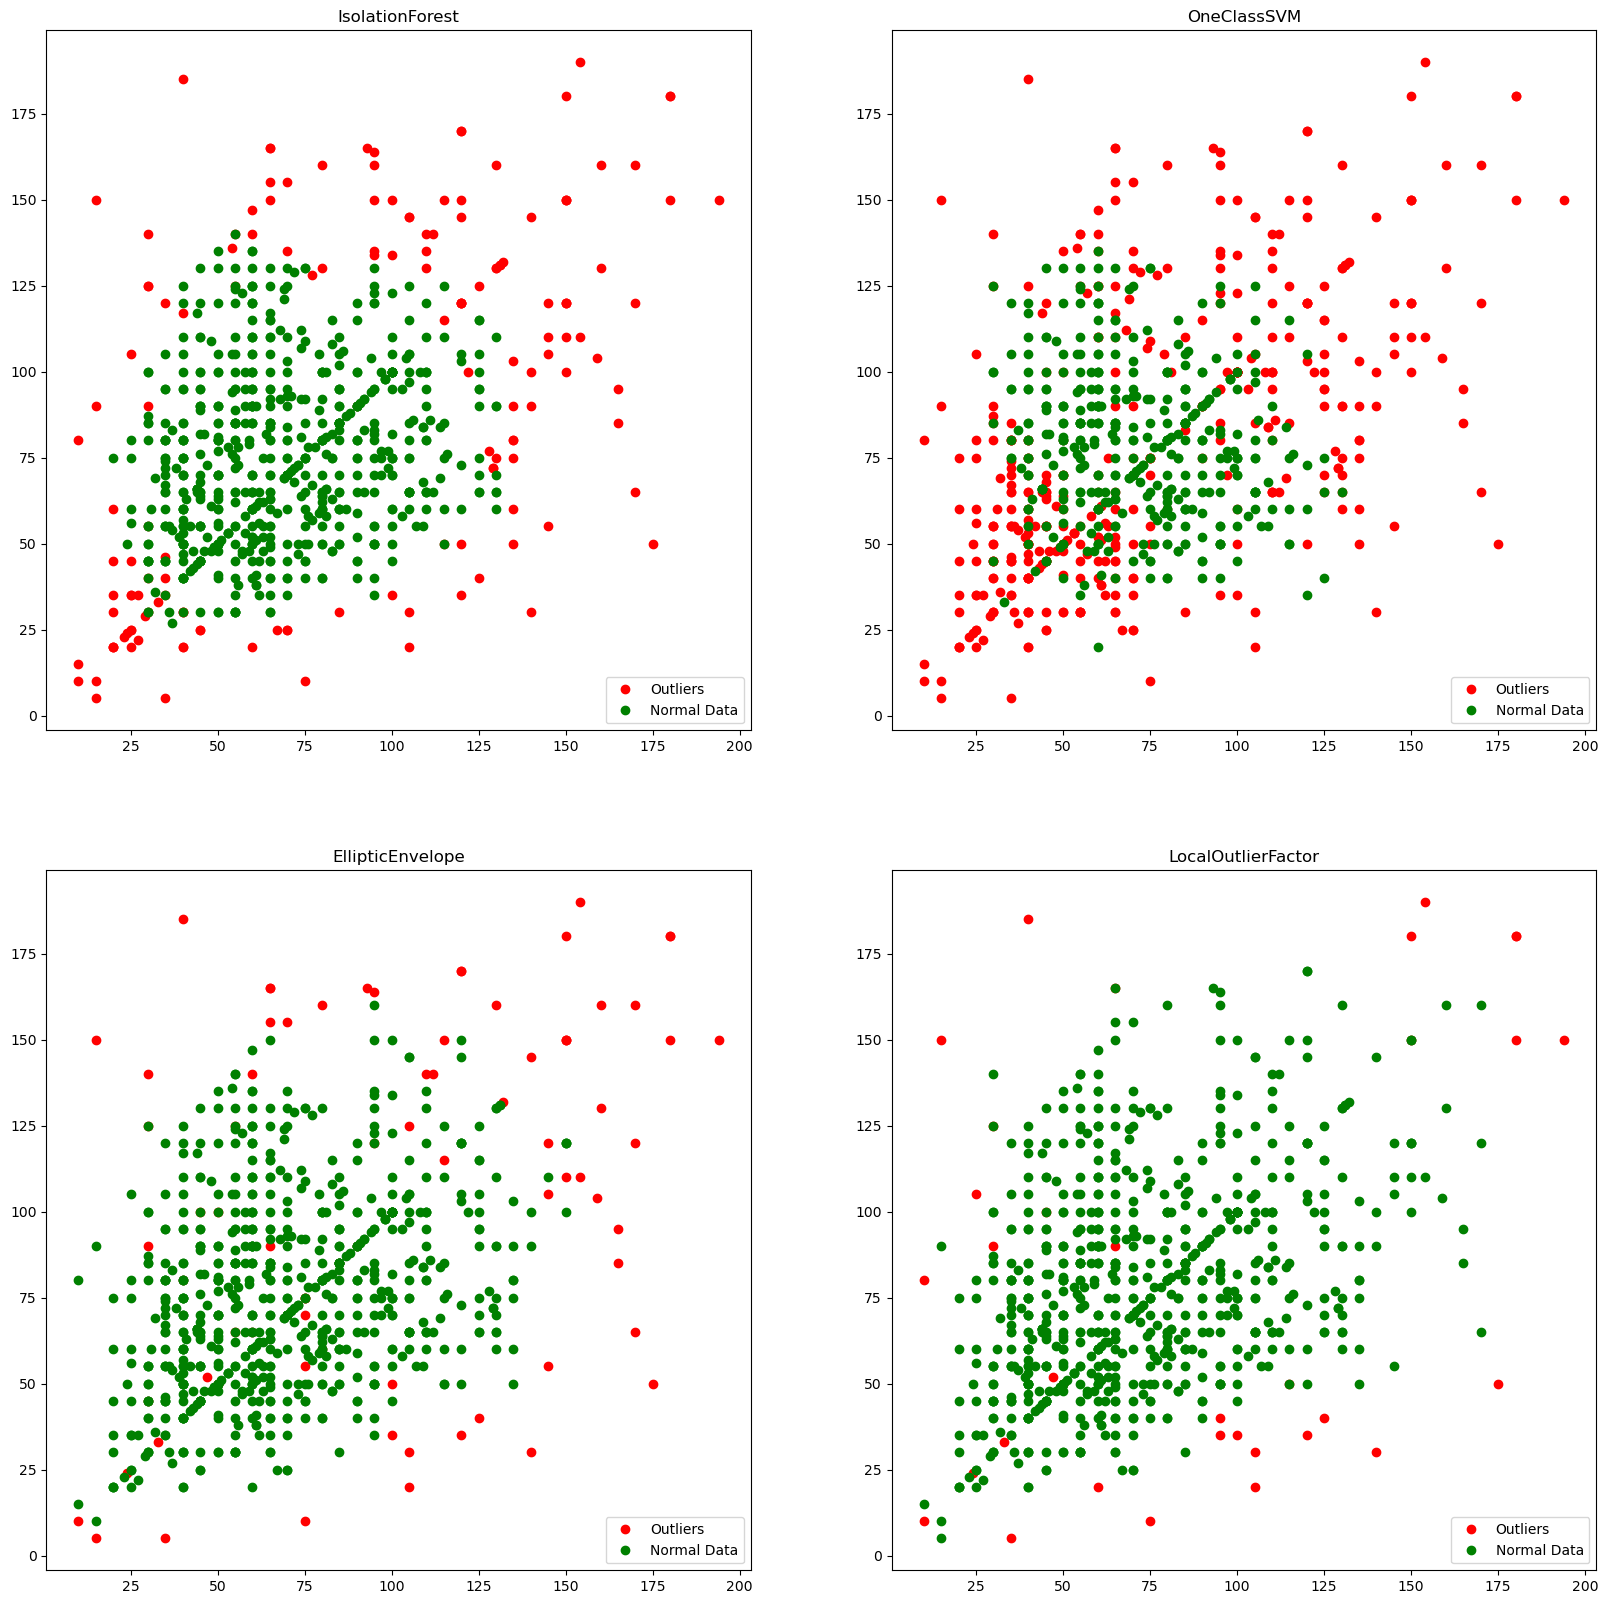

In [10]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
axs = axs.flatten()

models = [IsolationForest, OneClassSVM, EllipticEnvelope, LocalOutlierFactor]
for i, model_class in enumerate(models):
    model =  model_class()
    model.fit(temp.values)
    
    df = temp.copy()
    df['outliers'] = pd.Series(model.fit_predict(df.values))
    
    outliers = df[df['outliers'] == -1]
    df = df[df['outliers'] !=  -1]
    
    outlier_points, = axs[i].plot(outliers["Sp. Atk"], outliers["Attack"], "ro", label="Outliers")
    points, = axs[i].plot(df["Sp. Atk"], df["Attack"], "go", label="Normals")
    outlier_points.set_label("Outliers")
    points.set_label("Normal Data")
    axs[i].legend(loc=4)
    axs[i].set_title(type(model).__name__)
plt.show()

Let's draw some conclusions.

- **Isolation Forest** - As could observe the values that lies mostly on the borders of the dataset was marked as outliers, this is the result of how the IsolationForest algorithm works of dividing the space the more iterations of dividing the more probably that this element is not an outlier.
- **EllipticEnvelope** - Here isn't much to talk about there could be probably observed the margins of the imaginary ellipse that is created for isolating the outlier. Also, this is probably the faster and straight forward method for identification.
- **LocalOutlierFactor** - Again here could be observed that the samples that are further away from the other samples are marked as outliers. 
- **OneClassSVM** - Here could be observed that the values that are in most dense concentration are marked as normal and the ones that are not goes to outliers. Although, in the Handbook it's written that the SVM is a good classifier for outliers I will not call it like that as in this case it marked as outliers almost half of the samples.

**LocalOutlierFactor** and **EllipticEnvelope** are the models that will classify the outliers most human like.

### All data

Find the number of outliers on the whole data set (without the target column) for different values of *contamination* for each outliers detection algorithm.

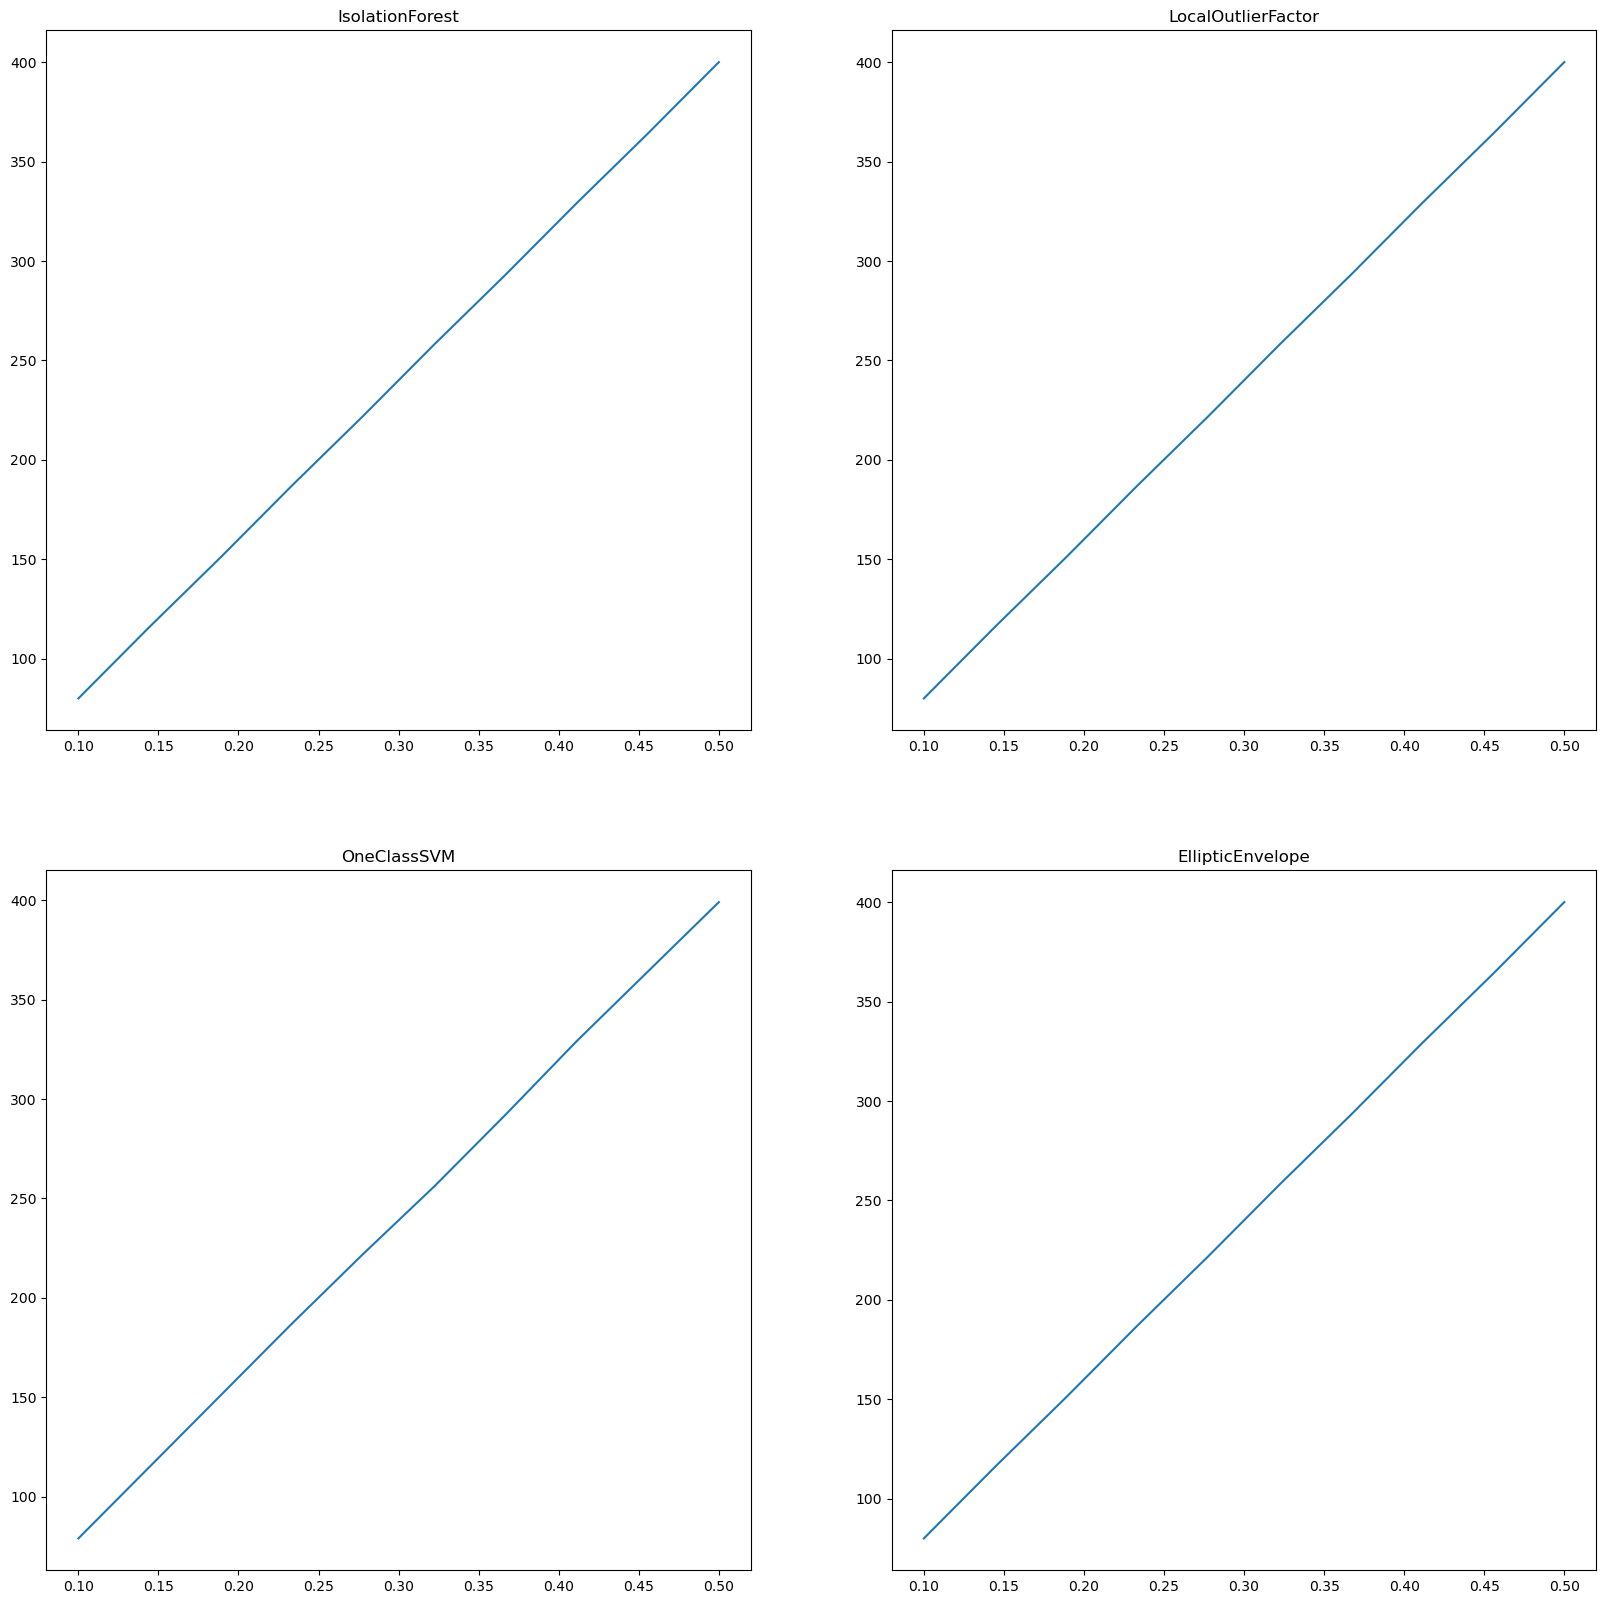

In [11]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')  

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
axs = axs.flatten()

contamination_values = np.linspace(0.1, 0.5, 10)
models = [IsolationForest, LocalOutlierFactor, OneClassSVM, EllipticEnvelope] # EllipticEnvelope, LocalOutlierFactor]

for i, model_class in enumerate(models):
    number_outliers = []
    for contamination in contamination_values:
        # because the OneClassSVM doesn't have an argument contamination we will use nu which is the same.
        if model_class == OneClassSVM:
            model = model_class(nu =contamination)
        else:
            model = model_class(contamination=contamination)
        model.fit(data)
        outliers = pd.Series(model.fit_predict(data.values))
        nr_outliers = outliers[outliers == -1].count()
        number_outliers.append(nr_outliers)
        
    axs[i].plot(contamination_values, np.array(number_outliers))
    axs[i].set_title(model_class.__name__)
plt.show()

The task asks to make conclusion on this graph but there isn't any useful information to get from this graph. Yes the nr of outliers grows as the contamination grows because by definition the contamination is the proportion of outliers from the dataset.

In [12]:
from sklearn.model_selection import train_test_split

target = data["Total"]
features = data.drop(["Total"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, shuffle=False)

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

outliers_models = [IsolationForest, LocalOutlierFactor, OneClassSVM, EllipticEnvelope, None] 
models = [LinearRegression(), KNeighborsRegressor()]

columns = ['Estimator', 'Outliers algorithm', "Mean Squared Error"]
result = pd.DataFrame( columns=columns)
for model in models:
    for outlier_model in outliers_models:
        if outlier_model is None:
            model.fit(x_train, y_train)
        else:
            outlier_model = outlier_model()
            outliers = pd.Series(outlier_model.fit_predict(x_train))
            
            boolean_indices = outliers != -1
    
            # Then filter both datasets using these indices
            x_clean = x_train.loc[boolean_indices]
            y_clean = y_train.loc[boolean_indices]
            
            model.fit(x_clean, y_clean)
        
        predicted = model.predict(x_test)
        score = mean_squared_error(y_test, predicted)
        result = pd.concat([result, pd.DataFrame([[model.__class__.__name__, outlier_model.__class__.__name__, score]], columns=columns)], ignore_index=True)

In [34]:
result

,Estimator,Outliers algorithm,Mean Squared Error
0,LinearRegression,IsolationForest,2.480599e-26
1,LinearRegression,LocalOutlierFactor,3.170926e-26
2,LinearRegression,OneClassSVM,2.315338e-26
3,LinearRegression,EllipticEnvelope,1.505525e-26
4,LinearRegression,NoneType,2.480599e-26
5,KNeighborsRegressor,IsolationForest,2.236020e+02
6,KNeighborsRegressor,LocalOutlierFactor,2.193433e+02
7,KNeighborsRegressor,OneClassSVM,1.027374e+03
8,KNeighborsRegressor,EllipticEnvelope,2.416153e+02
9,KNeighborsRegressor,NoneType,2.236020e+02


So as we could observe the NoneType (which in this case means that it's original dataset) isn't far away from other similar values. Therefor by removing the outliers we get a slighter increase in accuracy, although for this dataset it's not so observable. 

## Conclusion
The detection and removing of outliers helps in increasing accuracy in reducing time by skipping not needed values. This is a simple and yet not time consuming method to increase accuracy. And therefore should be applied when a better accuracy result is needed.